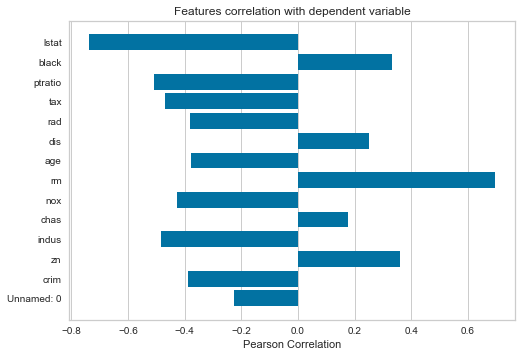

<AxesSubplot:title={'center':'Features correlation with dependent variable'}, xlabel='Pearson Correlation'>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df=pd.read_csv('Boston.csv')
habe=df
target=habe['medv']
features=habe.drop('medv', axis=1)



from yellowbrick.target import FeatureCorrelation

visualizer = FeatureCorrelation(labels=list(features.columns))
visualizer.fit(features, target)
visualizer.poof()

array([[<AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'rm'}>]], dtype=object)

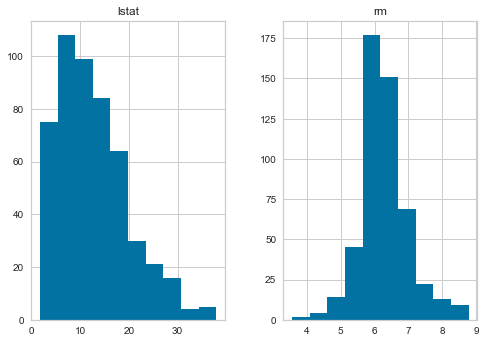

In [16]:
df[['lstat','rm']].hist()

In [17]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   crim        506 non-null    float64
 2   zn          506 non-null    float64
 3   indus       506 non-null    float64
 4   chas        506 non-null    int64  
 5   nox         506 non-null    float64
 6   rm          506 non-null    float64
 7   age         506 non-null    float64
 8   dis         506 non-null    float64
 9   rad         506 non-null    int64  
 10  tax         506 non-null    int64  
 11  ptratio     506 non-null    float64
 12  black       506 non-null    float64
 13  lstat       506 non-null    float64
dtypes: float64(10), int64(4)
memory usage: 55.5 KB


In [37]:
from sklearn.feature_selection import SelectKBest, f_regression
best1 = SelectKBest(f_regression, k=1).fit(features, target)
bestcolumns = features.columns[best1.get_support()]
myfeatures=features[bestcolumns]
print(myfeatures)

from sklearn.preprocessing import scale
X = pd.DataFrame(data=scale(myfeatures), columns=myfeatures.columns)
y = target

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =.2)
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
y_pred = linear_regression.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error

score = linear_regression.score(X_train, y_train)
r2score = r2_score(y_test, y_pred)
stddevscore = np.sqrt(mean_squared_error(y_test, y_pred))
print('Score: {}'.format(score))
print('r2_score: {}'.format(r2score))
print('stddev_score: {}'.format(stddevscore))

print('coef: ',linear_regression.coef_)
print('intercept: ',linear_regression.intercept_)

     lstat
0     4.98
1     9.14
2     4.03
3     2.94
4     5.33
..     ...
501   9.67
502   9.08
503   5.64
504   6.48
505   7.88

[506 rows x 1 columns]
Score: 0.5408505950620053
r2_score: 0.5499800452302505
stddev_score: 6.713335525282539
coef:  [-6.4721643]
intercept:  22.544121387345786


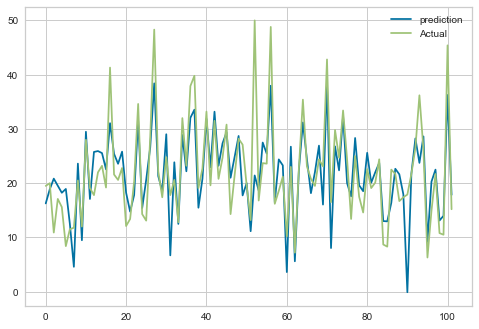

In [21]:
ax=plt.plot(y_pred, label='prediction')
plt.plot(y_test.values, label='Actual') 
plt.legend()

In [ ]:
sample_yes = df[(df['Survive'] == 1)]
sample_no = df[(df['Survive'] == 2)]

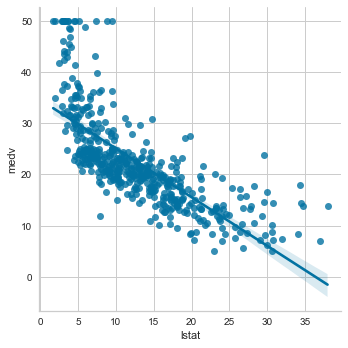

In [24]:
import seaborn as sns
sns.lmplot(data=df, x='lstat', y='medv')

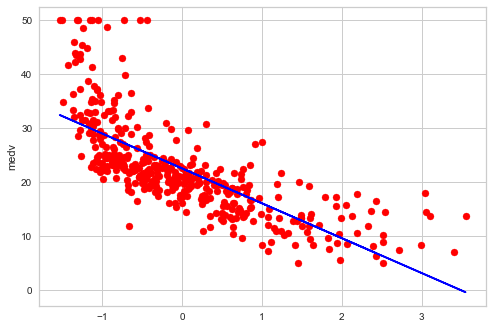

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


regressor = LinearRegression()
regressor.fit(X_train, y_train)
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.ylabel("medv")
plt.show()

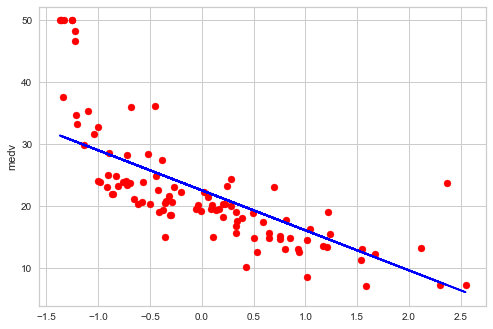

In [44]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_test, regressor.predict(X_test), color = 'blue')
plt.ylabel("medv")
plt.show()